In [8]:
# If a country has higher medicare spending, then theys should have less deaths/post-hospital accidents
# Compare the upper & lower estimates to the county's actual score
# then compare THAT chart to a count of how Medicare scored per patient in that county

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To import libraries
comp_deaths_hospitals = pd.read_csv("Complications and Deaths - Hospital 6.csv", low_memory=False)
readdmissions = pd.read_csv("Readmissions and Deaths - VA_07_10_2018 6.csv", low_memory=False)
medicare = pd.read_csv("Medicare Hospital Spending per Patient - Hospital 6.csv", low_memory=False)
u_visits = pd.read_csv("Unplanned Hospital Visits - Hospital 6.csv", low_memory=False)

comp_deaths_hospitals_ks_mo = comp_deaths_hospitals[(comp_deaths_hospitals['State']=='KS')|(comp_deaths_hospitals['State']=='MO')]
readdmissions_ks_mo = readdmissions[(readdmissions['State']=='KS')|(readdmissions['State']=='MO')]
medicare_ks_mo = medicare[(medicare['State']=='KS')|(medicare['State']=='MO')]
u_visits_ks_mo = u_visits[(u_visits['State']=='KS')|(u_visits['State']=='MO')]

comp_deaths_hospitals_county = comp_deaths_hospitals_ks_mo[(comp_deaths_hospitals['County Name']=='JACKSON')|
                                               (comp_deaths_hospitals['County Name']=='JOHNSON')|
                                               (comp_deaths_hospitals['County Name']=='CLAY')|
                                               (comp_deaths_hospitals['County Name']=='LEAVENWORTH')|
                                               (comp_deaths_hospitals['County Name']=='SEDGWICK')|
                                               (comp_deaths_hospitals['County Name']=='WYANDOTTE')]

readdmissions_county = readdmissions_ks_mo[(readdmissions['County']=='JACKSON')|
                                    (readdmissions['County']=='JOHNSON')|
                                    (readdmissions['County']=='CLAY')|
                                    (readdmissions['County']=='LEAVENWORTH')|
                                    (readdmissions['County']=='SEDGWICK')|
                                    (readdmissions['County']=='WYANDOTTE')]
                                      
medicare_county = medicare_ks_mo[(medicare['County Name']=='JACKSON')|
                          (medicare['County Name']=='JOHNSON')|
                          (medicare['County Name']=='CLAY')|
                          (medicare['County Name']=='LEAVENWORTH')|
                          (medicare['County Name']=='SEDGWICK')|
                          (medicare['County Name']=='WYANDOTTE')]

u_visits_county = u_visits_ks_mo[(u_visits['County Name']=='JACKSON')|
                          (u_visits['County Name']=='JOHNSON')|
                          (u_visits['County Name']=='CLAY')|
                          (u_visits['County Name']=='LEAVENWORTH')|
                          (u_visits['County Name']=='SEDGWICK')|
                          (u_visits['County Name']=='WYANDOTTE')]

comp_deaths_hospitals_county.head()

C:\Users\Sasha\Anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Provider ID,Hospital Name,Address,City,State,Zip Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,260096,NORTH KANSAS CITY HOSPITAL,2800 CLAY EDWARDS DRIVE,NORTH KANSAS CITY,MO,64116,CLAY,8166912000,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,1077,3.4,2.5,4.4,NaN,4/1/2014,3/31/2017
1,260096,NORTH KANSAS CITY HOSPITAL,2800 CLAY EDWARDS DRIVE,NORTH KANSAS CITY,MO,64116,CLAY,8166912000,Death rate for heart attack patients,MORT_30_AMI,No Different than the National Rate,297,12.4,10.1,15.2,NaN,7/1/2014,6/30/2017
2,260096,NORTH KANSAS CITY HOSPITAL,2800 CLAY EDWARDS DRIVE,NORTH KANSAS CITY,MO,64116,CLAY,8166912000,Death rate for CABG surgery patients,MORT_30_CABG,No Different than the National Rate,91,2.8,1.4,5.2,NaN,7/1/2014,6/30/2017
3,260096,NORTH KANSAS CITY HOSPITAL,2800 CLAY EDWARDS DRIVE,NORTH KANSAS CITY,MO,64116,CLAY,8166912000,Death rate for COPD patients,MORT_30_COPD,No Different than the National Rate,512,6.4,4.9,8.4,NaN,7/1/2014,6/30/2017
4,260096,NORTH KANSAS CITY HOSPITAL,2800 CLAY EDWARDS DRIVE,NORTH KANSAS CITY,MO,64116,CLAY,8166912000,Death rate for heart failure patients,MORT_30_HF,No Different than the National Rate,831,10.4,8.6,12.5,NaN,7/1/2014,6/30/2017


In [35]:
# Take the Higher Estimate & Lower Estimate of Deaths
jackson_medi = medicare_county[(medicare_ks_mo['County Name']=='JACKSON')]
jackson_m = jackson_medi[(jackson_medi["Score"]!='Not Available')]
jackson_death = comp_deaths_hospitals_county[(comp_deaths_hospitals_ks_mo['County Name']=='JACKSON')]
jackson_death = jackson_death[(jackson_death["Lower Estimate"]!="Not Available")|
                              (jackson_death["Higher Estimate"]!="Not Available")|
                              (jackson_death["Score"]!="Not Available")]
jackson_m_l = jackson_death["Lower Estimate"]
jackson_m_u = jackson_death["Higher Estimate"]
jackson_d = jackson_death["Score"]
jackson_s = jackson_m["Score"]

#jackson_m_l

In [69]:
johnson_medi = medicare_county[(medicare_ks_mo['County Name']=='JOHNSON')]
johnson_m = johnson_medi[(johnson_medi["Score"]!='Not Available')]
johnson_death = comp_deaths_hospitals_county[(comp_deaths_hospitals_ks_mo['County Name']=='JOHNSON')]
johnson_death = johnson_death[(johnson_death["Lower Estimate"]!="Not Available")|
                              (johnson_death["Higher Estimate"]!="Not Available")|
                              (johnson_death["Score"]!="Not Available")]
johnson_m_l = johnson_death["Lower Estimate"]
johnson_m_u = johnson_death["Higher Estimate"]
johnson_d = johnson_death["Score"]
johnson_s = johnson_m["Score"]



In [38]:
clay_medi = medicare_county[(medicare_ks_mo['County Name']=='CLAY')]
clay_m = clay_medi[(clay_medi["Score"]!='Not Available')]
clay_death = comp_deaths_hospitals_county[(comp_deaths_hospitals_ks_mo['County Name']=='CLAY')]
clay_death = clay_death[(clay_death["Lower Estimate"]!="Not Available")|
                              (clay_death["Higher Estimate"]!="Not Available")|
                              (clay_death["Score"]!="Not Available")]
clay_m_l = clay_death["Lower Estimate"]
clay_m_u = clay_death["Higher Estimate"]
clay_d = clay_death["Score"]
clay_s = clay_m["Score"]



In [39]:
leaven_medi = medicare_county[(medicare_ks_mo['County Name']=='LEAVENWORTH')]
leaven_m = leaven_medi[(leaven_medi["Score"]!='Not Available')]
leaven_death = comp_deaths_hospitals_county[(comp_deaths_hospitals_ks_mo['County Name']=='LEAVENWORTH')]
leaven_death = leaven_death[(leaven_death["Lower Estimate"]!="Not Available")|
                              (leaven_death["Higher Estimate"]!="Not Available")|
                              (leaven_death["Score"]!="Not Available")]
leaven_m_l = leaven_death["Lower Estimate"]
leaven_m_u = leaven_death["Higher Estimate"]
leaven_d = leaven_death["Score"]
leaven_s = leaven_m["Score"]



In [40]:
sedg_medi = medicare_county[(medicare_ks_mo['County Name']=='SEDGWICK')]
sedg_m = sedg_medi[(sedg_medi["Score"]!='Not Available')]
sedg_death = comp_deaths_hospitals_county[(comp_deaths_hospitals_ks_mo['County Name']=='SEDGWICK')]
sedg_death = sedg_death[(sedg_death["Lower Estimate"]!="Not Available")|
                              (sedg_death["Higher Estimate"]!="Not Available")|
                              (sedg_death["Score"]!="Not Available")]
sedg_m_l = sedg_death["Lower Estimate"]
sedg_m_u = sedg_death["Higher Estimate"]
sedg_d = sedg_death["Score"]
sedg_s = sedg_m["Score"]



In [41]:
wyan_medi = medicare_county[(medicare_ks_mo['County Name']=='WYANDOTTE')]
wyan_m = wyan_medi[(wyan_medi["Score"]!='Not Available')]
wyan_death = comp_deaths_hospitals_county[(comp_deaths_hospitals_ks_mo['County Name']=='WYANDOTTE')]
wyan_death = wyan_death[(wyan_death["Lower Estimate"]!="Not Available")|
                              (wyan_death["Higher Estimate"]!="Not Available")|
                              (wyan_death["Score"]!="Not Available")]
wyan_m_l = wyan_death["Lower Estimate"]
wyan_m_u = wyan_death["Higher Estimate"]
wyan_d = wyan_death["Score"]
wyan_s = wyan_m["Score"]


NameError: name 'johnson_m_l' is not defined

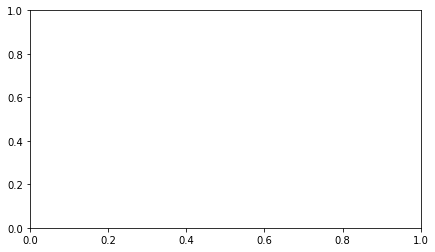

In [42]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(johnson_m_l)
ax.plot(johnson_m_u)
ax.plot(johnson_d)
ax.set_title('Upper and Lower Estimates of Johnson')
ax.set_ylabel('#s')
ax.legend()
plt.show()

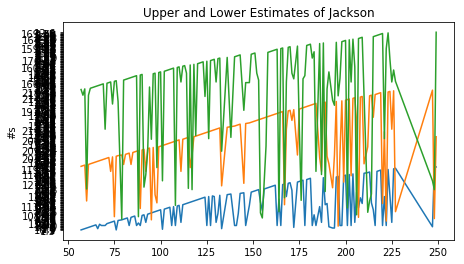

In [43]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(jackson_m_l)
ax.plot(jackson_m_u)
ax.plot(jackson_d)
ax.set_title('Upper and Lower Estimates of Jackson')
ax.set_ylabel('#s')
ax.legend()
plt.show()

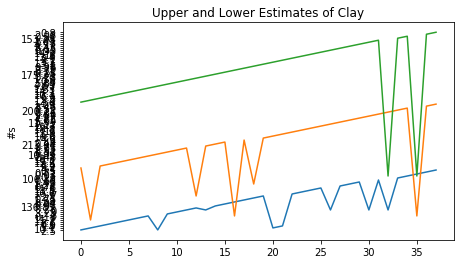

In [44]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(clay_m_l)
ax.plot(clay_m_u)
ax.plot(clay_d)
ax.set_title('Upper and Lower Estimates of Clay')
ax.set_ylabel('#s')
ax.legend()
plt.show()

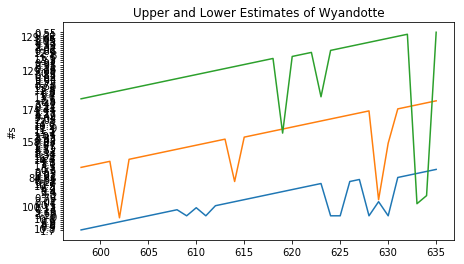

In [34]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(wyan_m_l)
ax.plot(wyan_m_u)
ax.plot(wyan_d)
ax.set_title('Upper and Lower Estimates of Wyandotte')
ax.set_ylabel('#s')
ax.legend()
plt.show()

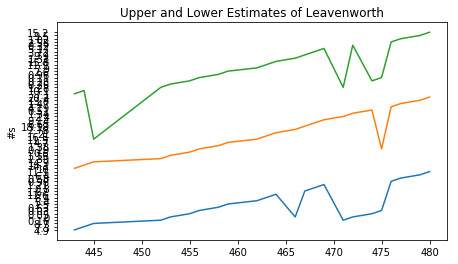

In [45]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(leaven_m_l)
ax.plot(leaven_m_u)
ax.plot(leaven_d)
ax.set_title('Upper and Lower Estimates of Leavenworth')
ax.set_ylabel('#s')
ax.legend()
plt.show()

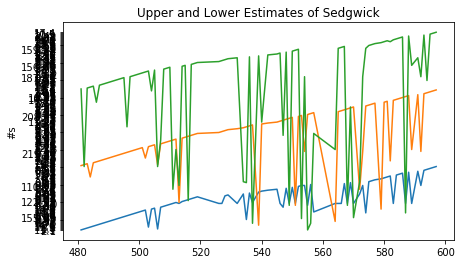

In [46]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(sedg_m_l)
ax.plot(sedg_m_u)
ax.plot(sedg_d)
ax.set_title('Upper and Lower Estimates of Sedgwick')
ax.set_ylabel('#s')
ax.legend()
plt.show()